# Convolutional neural network (CNN) 
Use MNIST Fashion Dataset and create a classifier to classify fashion clothing into categories.

In [54]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [55]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras import layers, models
from tensorflow.keras.utils import to_categorical

In [56]:
# load data
df_train = pd.read_csv('fashion-mnist_train.csv')
df_test = pd.read_csv('fashion-mnist_test.csv')

In [57]:
df_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
df_test.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,9,8,...,103,87,56,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,2,0,0,0,0,0,0,14,53,99,...,0,0,0,0,63,53,31,0,0,0
3,2,0,0,0,0,0,0,0,0,0,...,137,126,140,0,133,224,222,56,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [59]:
# split train and test data
x_train = df_train.iloc[:, 1:]
y_train = df_train.iloc[:, 0]

x_test = df_test.iloc[:, 1:]
y_test = df_test.iloc[:, 0]

In [60]:
# normalize pixel data (0-1 range)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [61]:
x_train.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.019608,0.0,0.0,...,0.000000,0.0,0.0,0.117647,0.168627,0.000000,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.003922,0.007843,0.0,0.0,0.000000,0.0,0.0,...,0.011765,0.0,0.0,0.000000,0.000000,0.003922,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0


In [62]:
x_test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.035294,0.031373,0.000000,...,0.403922,0.341176,0.219608,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.133333,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.054902,0.207843,0.388235,0.066667,...,0.000000,0.000000,0.000000,0.0,0.247059,0.207843,0.121569,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.631373,...,0.537255,0.494118,0.549020,0.0,0.521569,0.878431,0.870588,0.219608,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0


In [63]:
# reshape data to make it suitable for Conv2D: (h, w, channels)
x_train, x_test = x_train.values.reshape(-1, 28, 28, 1), x_test.values.reshape(-1, 28, 28, 1)

In [64]:
x_train.shape

(60000, 28, 28, 1)

In [65]:
# one-hot encoding of labels
y_train, y_test = to_categorical(y_train, num_classes=10), to_categorical(y_test, num_classes=10)

In [66]:
y_train

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 0., 1., 0.],
       [0., 0., 0., ..., 1., 0., 0.]])

In [67]:
# build model
model = models.Sequential()

In [68]:
# add layers
model.add(layers.Conv2D(32, (3,3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Conv2D(64, (3,3), activation='relu'))
model.add(layers.MaxPooling2D((2,2)))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))

C:\Users\ASHWIN\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [69]:
# compile model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [70]:
# train model
history = model.fit(x_train, y_train, epochs=10, validation_split=0.1)

Epoch 1/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 27s 14ms/step - accuracy: 0.7526 - loss: 0.6909 - val_accuracy: 0.8737 - val_loss: 0.3558
Epoch 2/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 30s 18ms/step - accuracy: 0.8780 - loss: 0.3419 - val_accuracy: 0.8937 - val_loss: 0.3064
Epoch 3/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.8980 - loss: 0.2832 - val_accuracy: 0.8945 - val_loss: 0.2819
Epoch 4/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 20s 12ms/step - accuracy: 0.9088 - loss: 0.2516 - val_accuracy: 0.9058 - val_loss: 0.2645
Epoch 5/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 19s 11ms/step - accuracy: 0.9191 - loss: 0.2214 - val_accuracy: 0.9080 - val_loss: 0.2534
Epoch 6/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23911s 14s/step - accuracy: 0.9344 - loss: 0.1778 - val_accuracy: 0.9113 - val_loss: 0.2465
Epoch 8/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9415 - loss: 0.1595 - val_accuracy: 0.9143 - val_loss: 0.2541
Epoch 9/10
1688/1688 ━━━━━━━━━━━━━━━━━━━━ 23s 14ms/step - accuracy: 0.9470

In [71]:
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)                    │ (None, 26, 26, 32)          │             320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 13, 13, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 11, 11, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 5, 5, 64)            │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1600)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 64)                  │         102,464 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 10)                  │             650 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 365,792 (1.40 MB)

 Trainable params: 121,930 (476.29 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 243,862 (952.59 KB)

In [72]:
# evaluation metrics
loss, accuracy = model.evaluate(x_test, y_test, verbose=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step - accuracy: 0.9096 - loss: 0.2612


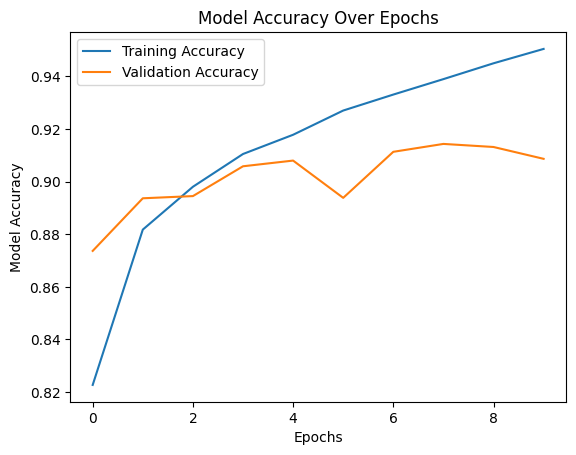

In [73]:
# accuracy vs epochs
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Model Accuracy')
plt.legend()
plt.show()

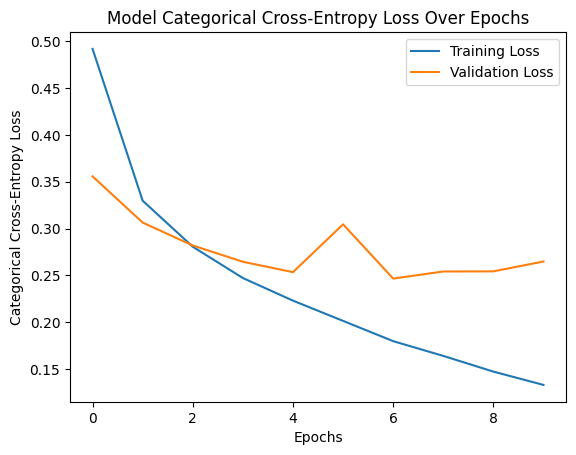

In [74]:
# loss vs epochs
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Categorical Cross-Entropy Loss Over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Categorical Cross-Entropy Loss')
plt.legend()
plt.show()

In [75]:
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']

In [76]:
predictions = model.predict(x_test[:10])
predictions

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 373ms/step


array([[9.8371929e-01, 4.6785314e-07, 3.2646603e-06, 4.3797950e-04,
        7.3893258e-05, 1.3666453e-07, 1.5765015e-02, 1.9084757e-08,
        2.2405226e-08, 3.8796744e-11],
       [7.4876816e-09, 1.0000000e+00, 1.0375109e-09, 2.8257339e-09,
        8.9134361e-10, 1.7306587e-11, 3.9039762e-08, 9.4390031e-15,
        1.1363058e-12, 3.8851352e-13],
       [2.0795658e-02, 3.3150687e-11, 9.2065430e-01, 1.6358454e-03,
        1.3022098e-07, 9.2186845e-09, 5.6914009e-02, 8.1176488e-09,
        3.3981173e-09, 8.6212935e-08],
       [5.8670039e-03, 3.4263358e-03, 8.9195895e-01, 3.6458779e-02,
        2.7679137e-04, 2.7049193e-04, 6.1733916e-02, 2.3678119e-07,
        2.8020606e-06, 4.6665868e-06],
       [3.3061566e-05, 1.1902409e-06, 1.3963111e-03, 9.5083523e-01,
        4.7585713e-03, 4.3136978e-09, 4.2619899e-02, 3.0391939e-07,
        3.5533690e-04, 1.1300213e-08],
       [4.1864131e-02, 2.2583237e-08, 1.1382722e-01, 4.2654134e-04,
        4.8109046e-05, 5.3395188e-06, 8.4376144e-01, 7.96

In [77]:
prediction_indices = []
prediction_labels = []
for p in predictions:
    index = np.argmax(p)
    prediction_indices.append(index)
    prediction_labels.append(labels[index])
    # print(f'{np.argmax(p)}')

prediction_indices

[0, 1, 2, 2, 3, 6, 8, 6, 5, 0]

In [78]:
prediction_labels

['t_shirt',
 'trouser',
 'pullover',
 'pullover',
 'dress',
 'shirt',
 'bag',
 'shirt',
 'sandal',
 't_shirt']

t_shirt



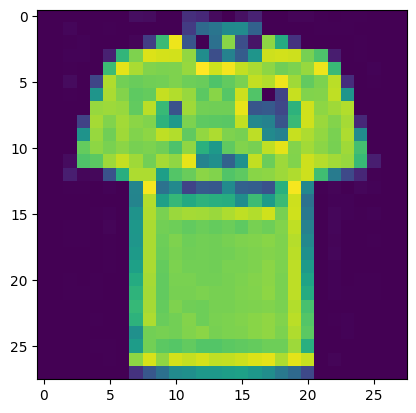

trouser



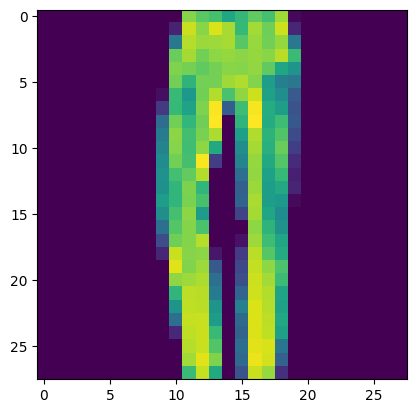

pullover



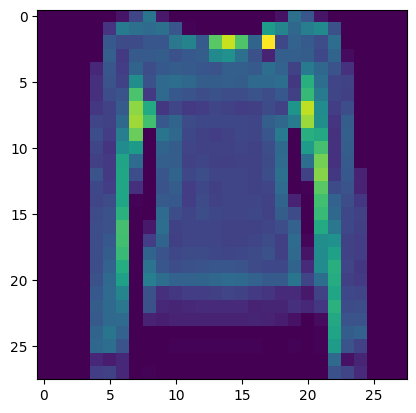

pullover



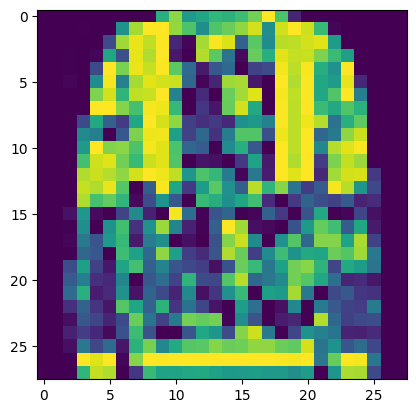

dress



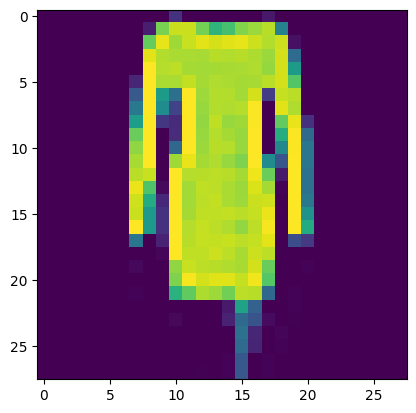

shirt



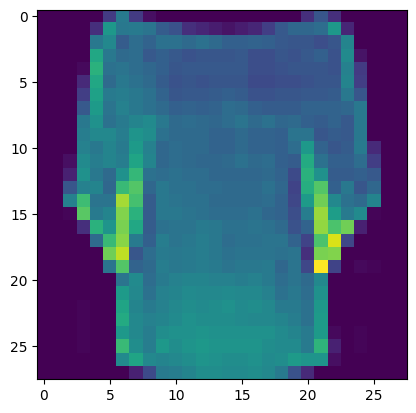

bag



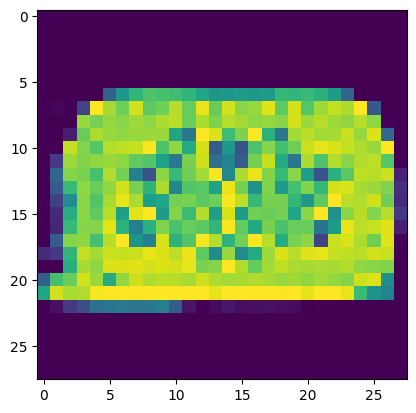

shirt



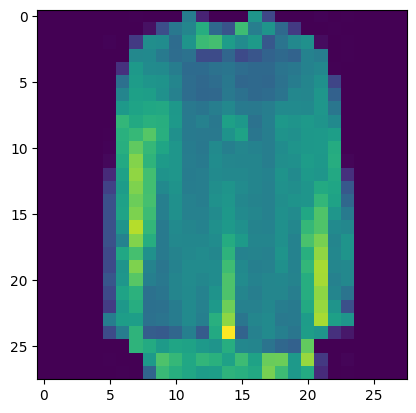

sandal



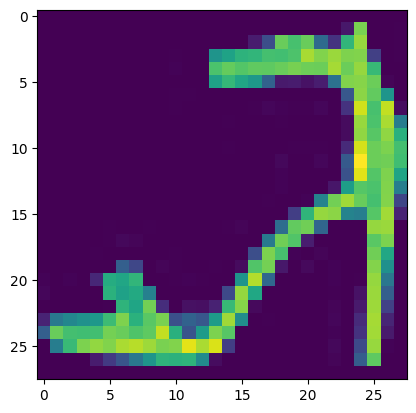

t_shirt



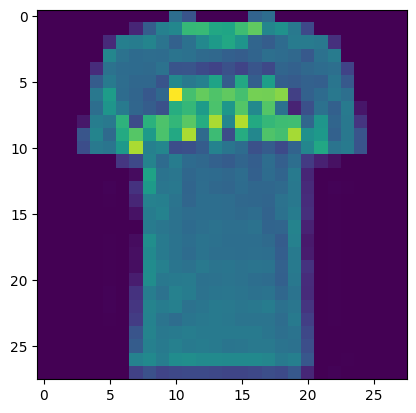

In [79]:
for i in range(10):
    print(f'{prediction_labels[i]}\n')
    plt.imshow(x_test[i])
    plt.show()

In [80]:
# confusion matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [81]:
y_pred = model.predict(x_test)

actual_labels = np.argmax(y_test, axis=1)
predicted_labels = np.argmax(y_pred, axis=1)

313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step


In [82]:
cm = confusion_matrix(actual_labels, predicted_labels)

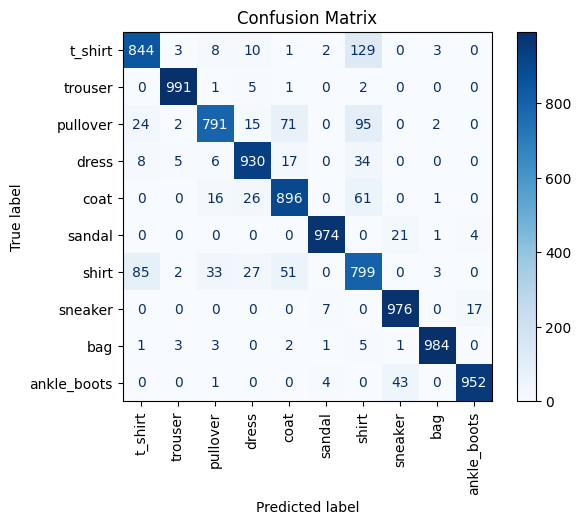

In [83]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues', xticks_rotation=90)
plt.title('Confusion Matrix')
plt.show()